In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# BEISPIEL 1
## Fitten eines linearen Bereiches der Daten

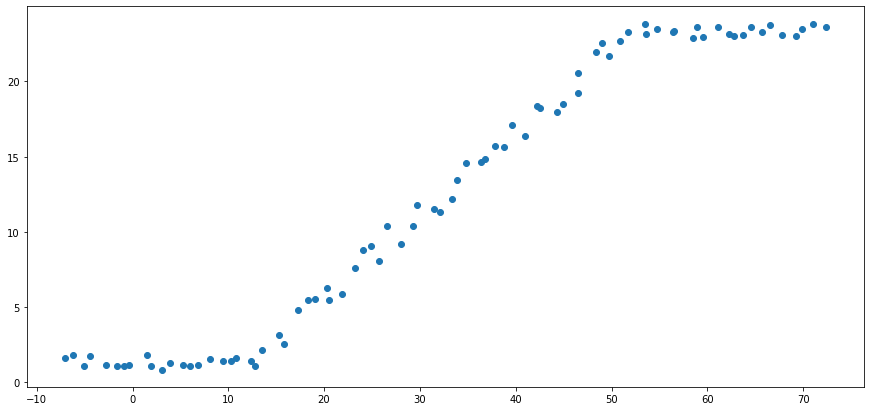

In [2]:
# DATENIMPORT

data = np.loadtxt("stepData.txt",skiprows=1).T
freq = data[0]
volt = data[1]

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(freq,volt,'o')

(array([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]),)


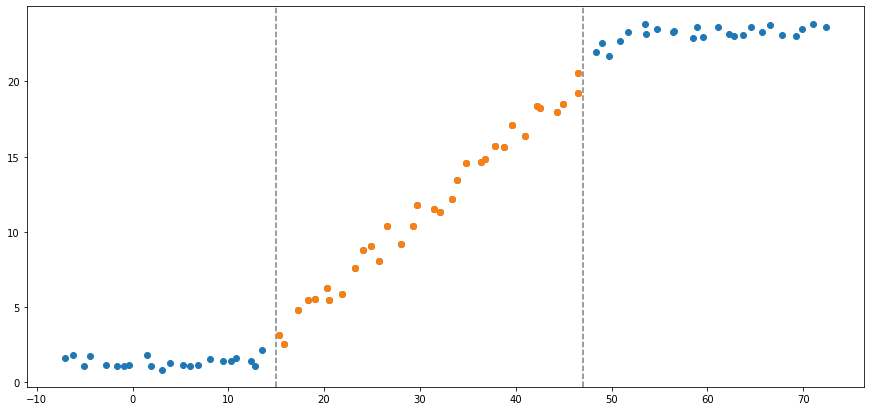

In [3]:
# ERMITTELUNG LINEARER BEREICH

lowBound = 15 # per augenmaß. Vermeide nicht linearen bereich! -> konservatives Intervall
upBound = 47

linMask = np.where( np.logical_and(freq>lowBound,freq<upBound) ) # maske des linearen Bereiches im x-Array
print(linMask)

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(freq,volt,'o')
ax.axvline(lowBound,color='grey',linestyle='--')
ax.axvline(upBound,color='grey',linestyle='--')
ax.plot(freq[linMask],volt[linMask],'o')


Optimierte Parameter:
 [ 0.53395349 -4.90074966]

Kovarianz-Matrix:
 [[ 1.48464506e-04 -4.60204982e-03]
 [-4.60204982e-03  1.56017917e-01]]

StdAbw:
 [0.0121846  0.39499103]

rel. StdAbw:
 [0.02281959 0.08059808]


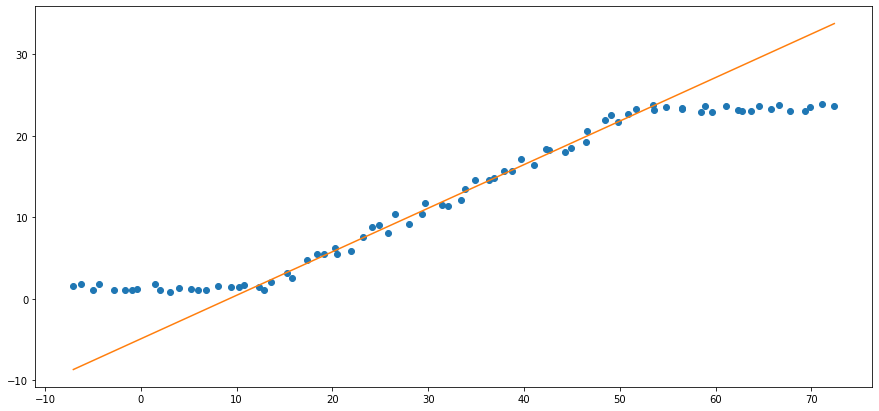

In [4]:
# FITTEN

# modell

def linMod(x,a,b):
    return a*x+b

# fitroutine
popt, pcov = curve_fit(linMod, freq[linMask], volt[linMask]) # einfaches Modell -> kein pGuess nötig
print("\nOptimierte Parameter:\n", popt)
print("\nKovarianz-Matrix:\n", pcov)
print("\nStdAbw:\n", np.sqrt(np.diag(pcov)) )
print("\nrel. StdAbw:\n", np.sqrt(np.diag(pcov))/np.abs(popt) )

# darstellung
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(freq,volt,'o')
ax.plot(freq,linMod(freq,*popt))

# Problematisch: Nutzung des global state von matplotlib
#plt.plot(freq,volt,'o')
#plt.plot(freq,linMod(freq,*popt))

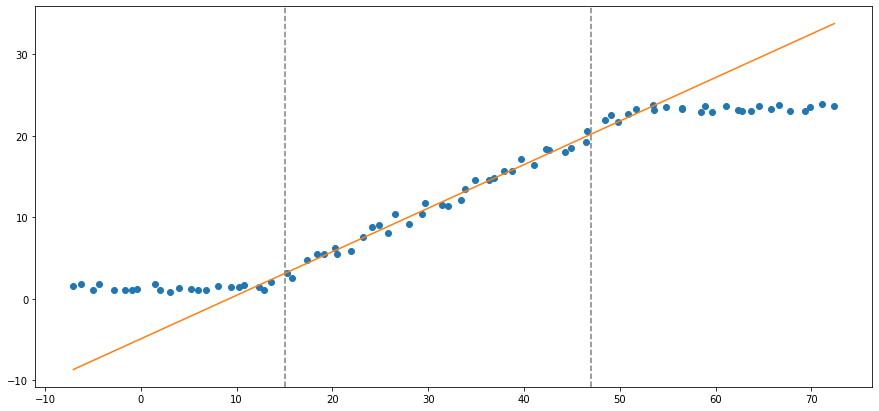

In [5]:
# UNKOMMENTIERTER, RELEVANTER CODE: (=ZUSAMMENFASSUNG)

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = np.loadtxt("stepData.txt",skiprows=1).T
freq = data[0]
volt = data[1]

lowBound = 15
upBound = 47
linMask = np.where( np.logical_and(freq>lowBound,freq<upBound) )

def linMod(x,a,b):
    return a*x+b

popt, pcov = curve_fit(linMod, freq[linMask], volt[linMask])

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(freq,volt,'o')
ax.axvline(lowBound,color='grey',linestyle='--')
ax.axvline(upBound,color='grey',linestyle='--')
ax.plot(freq,linMod(freq,*popt))

# BEISPIEL 2
## Fitten mit komplexeren Modellen

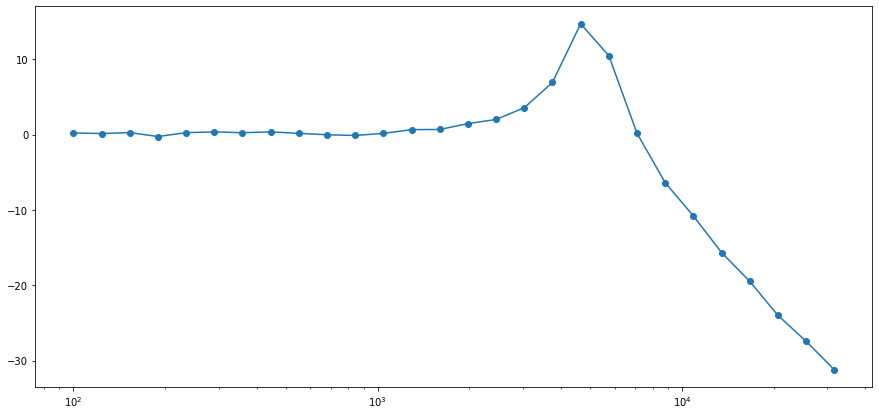

In [6]:
data = np.loadtxt("tiefpass2ord.txt",skiprows=1).T
freq = data[0]
gaindB = data[1]

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(freq,gaindB,'o-')
ax.set_xscale("log") # Achtung: Unterschied zu plt.xscale("log")

In [7]:
def tpass2ord(f,C,L,R):
    w=f*2*np.pi
    XL = w*L
    XC = -1/(w*C)
    
    A = np.abs( 1j*XC / ( 1j*XC + 1j*XL + R))
    AdB = 20* np.log10( A )
    return AdB

## Scheiternde Fit-Routine

/Users/Felix/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',



Optimierte Parameter:
 [ 7.88954049e-06 -6.24212347e-05  4.18411385e-05]

Kovarianz-Matrix:
 [[inf inf inf]
 [inf inf inf]
 [inf inf inf]]


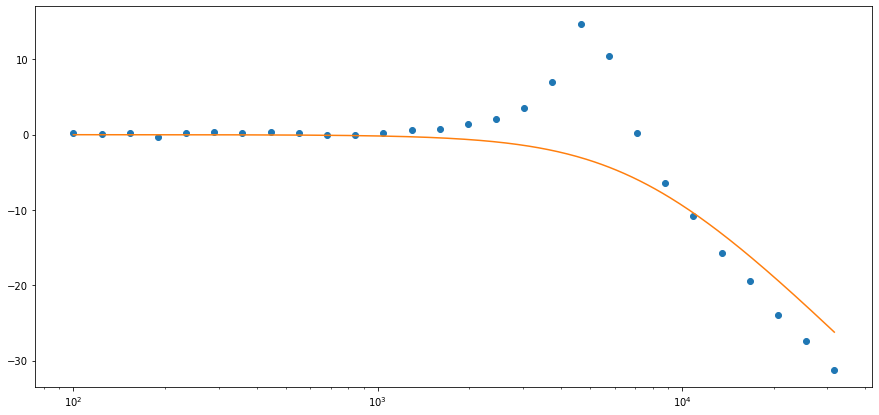

In [8]:
popt, pcov = curve_fit(tpass2ord, freq, gaindB)
print("\nOptimierte Parameter:\n", popt)
print("\nKovarianz-Matrix:\n", pcov)

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(freq,gaindB,'o')
freqs=np.logspace(2,4.5,400)
ax.plot(freqs,tpass2ord(freqs,*popt))
ax.set_xscale("log")

### Alternative 1: Fit-Routine mit Start-Parametern

Opt: [7.83392965e-09 1.25257574e-01 3.58528465e+02]


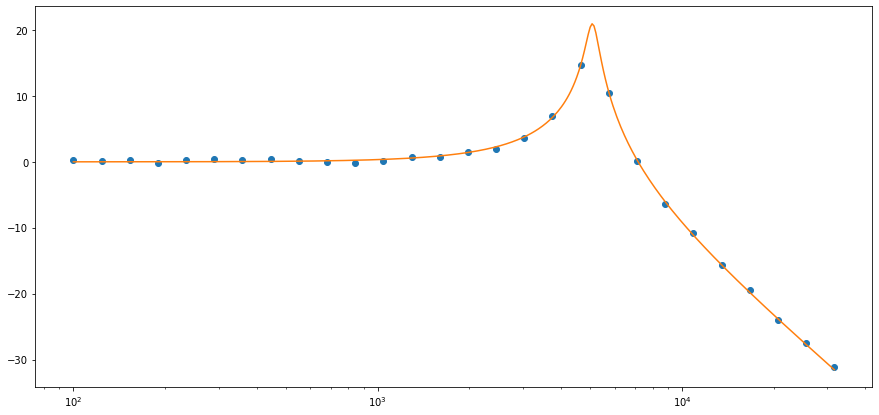

In [9]:
pGuess=(1e-8,0.1,300)
popt, pcov = curve_fit(tpass2ord, freq, gaindB, p0=pGuess)
print("Opt:", popt)

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(freq,gaindB,'o')
freqs=np.logspace(2,4.5,400)
ax.plot(freqs,tpass2ord(freqs,*popt))
ax.set_xscale("log")

## Alternative 2: Fit-Routine mit Parametern-Grenzen

Opt: [9.07927552e-09 1.05648087e-01 4.24836452e+02]


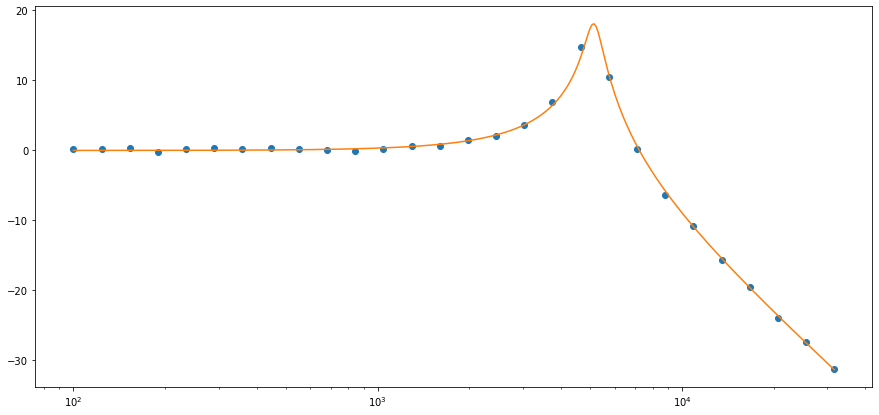

In [10]:
bounds = ([1e-10, 0.01, 20],
          [1e-7,  1.,  500])
popt, pcov = curve_fit(tpass2ord, freq, gaindB, bounds=bounds)
print("Opt:", popt)

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(freq,gaindB,'o')
freqs=np.logspace(2,4.5,400)
ax.plot(freqs,tpass2ord(freqs,*popt))
ax.set_xscale("log")

## Alternative 3: Fit-Routine mit Parametern der Größenordnung 1

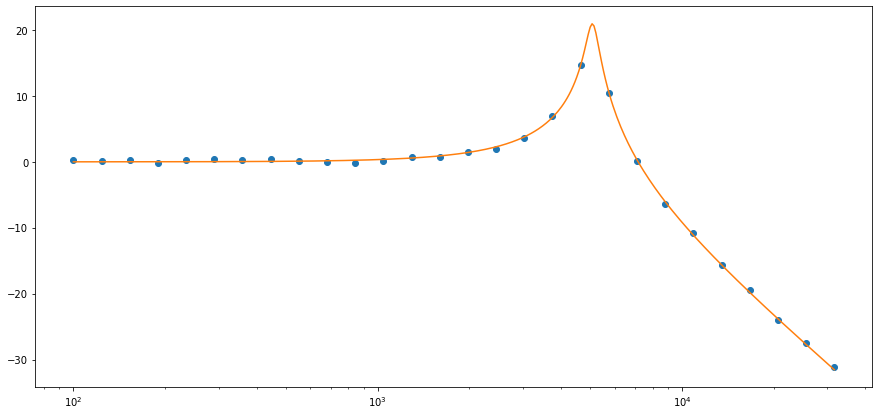

In [11]:
def tpass2ordScaled(f,C,L,R):
    return tpass2ord(f,C*1e-8,L*1e-1,R*1e2)

popt, pcov = curve_fit(tpass2ordScaled, freq, gaindB, p0=[1,1,1],)

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(freq,gaindB,'o')
freqs=np.logspace(2,4.5,400)
ax.plot(freqs,tpass2ordScaled(freqs,*popt))
ax.set_xscale("log")